In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model

# load digits dataset
digits = load_digits()
print(digits.data.shape)

existing_df = digits.data
target_existing_df = digits.target

#now split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(existing_df, target_existing_df, test_size = 0.2)


(1797, 64)


[0.28912041 0.47174829 0.64137175 0.75807724 0.84108978 0.90674662
 0.94984789 0.9791736  1.        ]
No. of components required to reach 95% of the variance is - 7


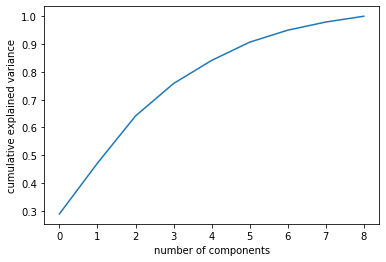

In [5]:
lda = LDA(n_components=7) #

lda.fit(existing_df,target_existing_df)

plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

print('No. of components required to reach 95% of the variance is - 7')

In [86]:
transformed_df = lda.transform(existing_df)

#now split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(transformed_df, target_existing_df, test_size = 0.2)

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

predictions =logistic.predict(x_test)
score = metrics.accuracy_score(predictions ,y_test) # to check the accuracy
print('LogisticRegression with LDA accuracy : ')
print(score) 

LogisticRegression with LDA accuracy : 
0.9583333333333334


c:\users\akshaysh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
